In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [83]:
# dataset link : 'https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset'
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [84]:
df.shape

(1025, 14)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [86]:
df.nunique()

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [87]:
continuous_features = [col for col in df.columns if df[col].nunique()>5]
categorical_features = [col for col in df.columns if df[col].nunique()<=5]
print(f"Continuous features are {continuous_features}")
print(f"Categorical features are {categorical_features}")

Continuous features are ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical features are ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [88]:
stats = df[continuous_features].describe().T
stats['Median'] = df[continuous_features].median()
stats['Skewness'] = df[continuous_features].skew()
stats

,count,mean,std,min,25%,50%,75%,max,Median,Skewness
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0,56.0,-0.248866
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0,130.0,0.739768
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0,240.0,1.074073
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0,152.0,-0.513777
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2,0.8,1.210899


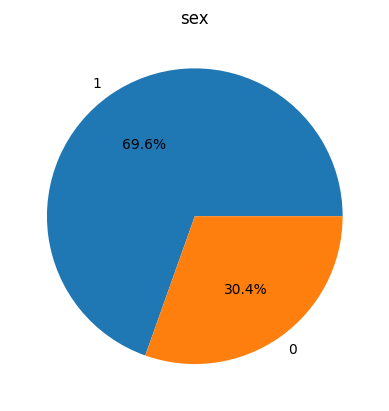

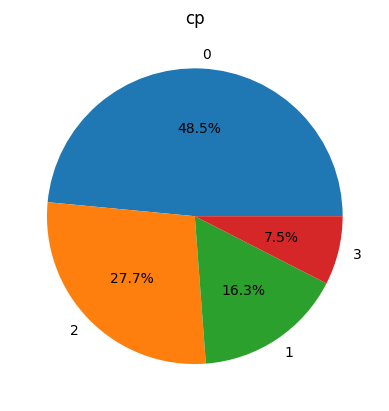

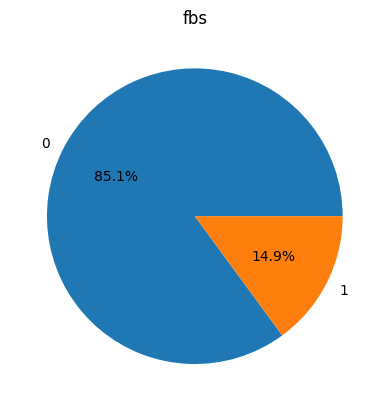

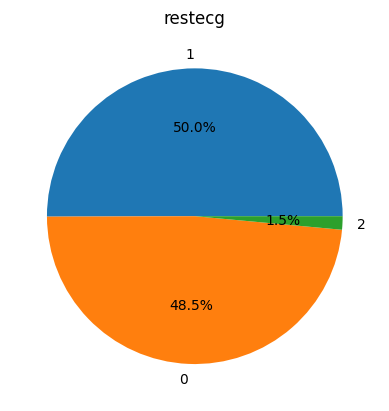

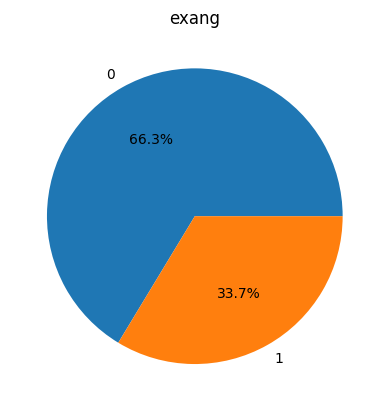

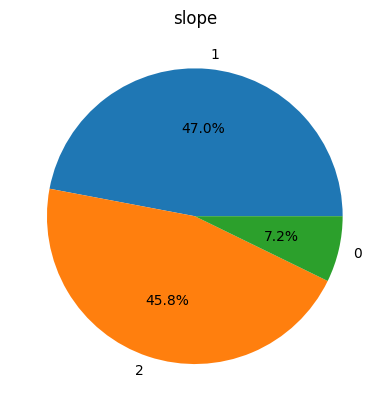

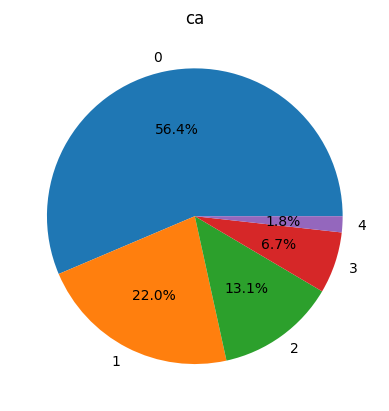

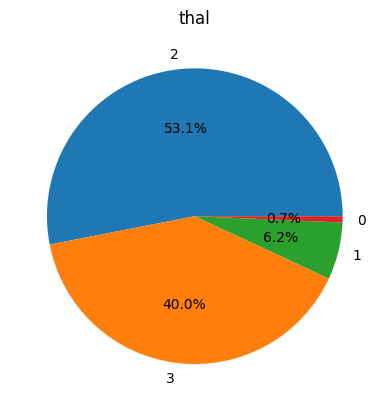

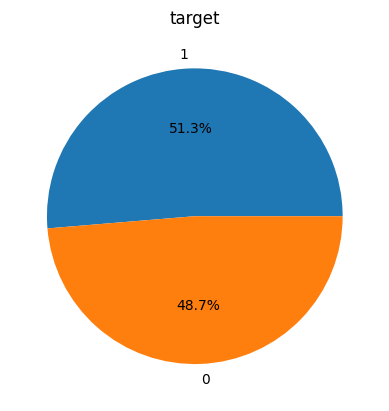

In [89]:
for col in categorical_features:
  plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%')
  plt.title(col)
  plt.show()

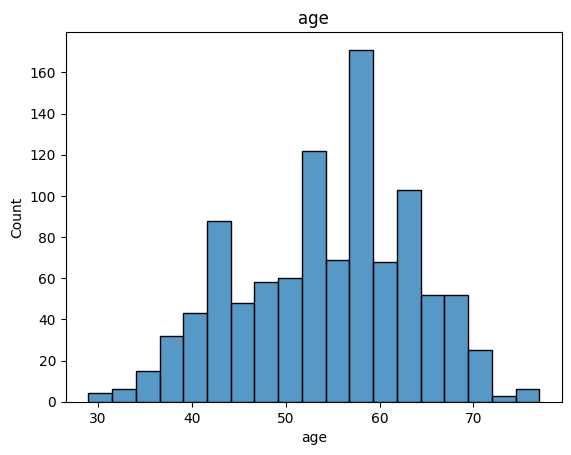

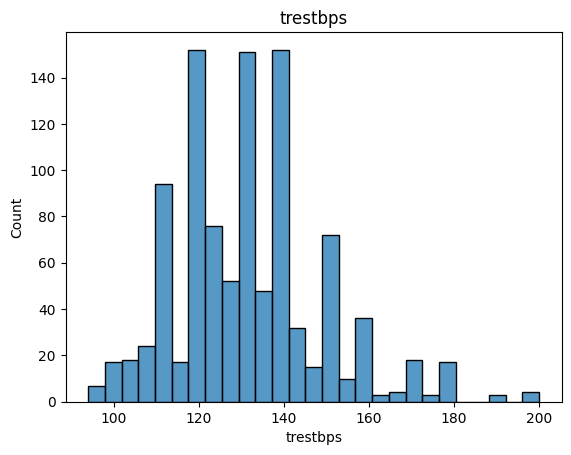

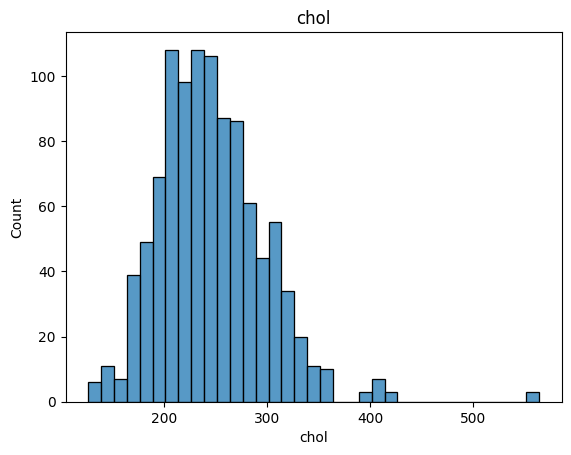

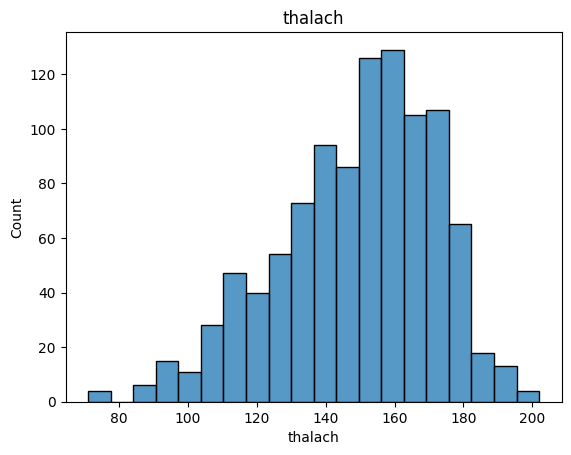

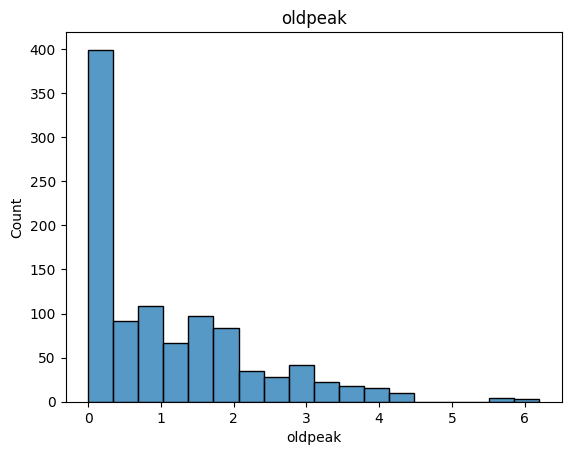

In [90]:
for col in continuous_features:
  sns.histplot(df[col])
  plt.title(col)
  plt.show()

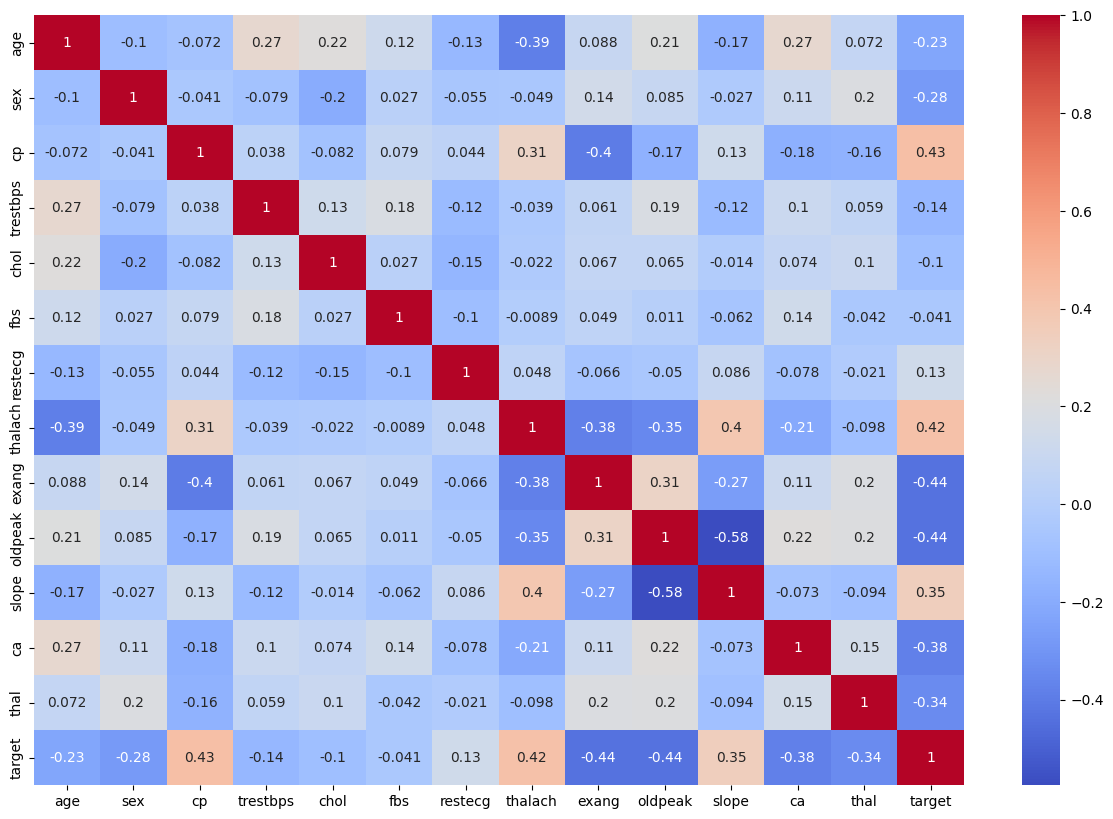

In [91]:
#Visualizing relationship between features using correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [92]:
#Splitting the data into train-test split
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [93]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

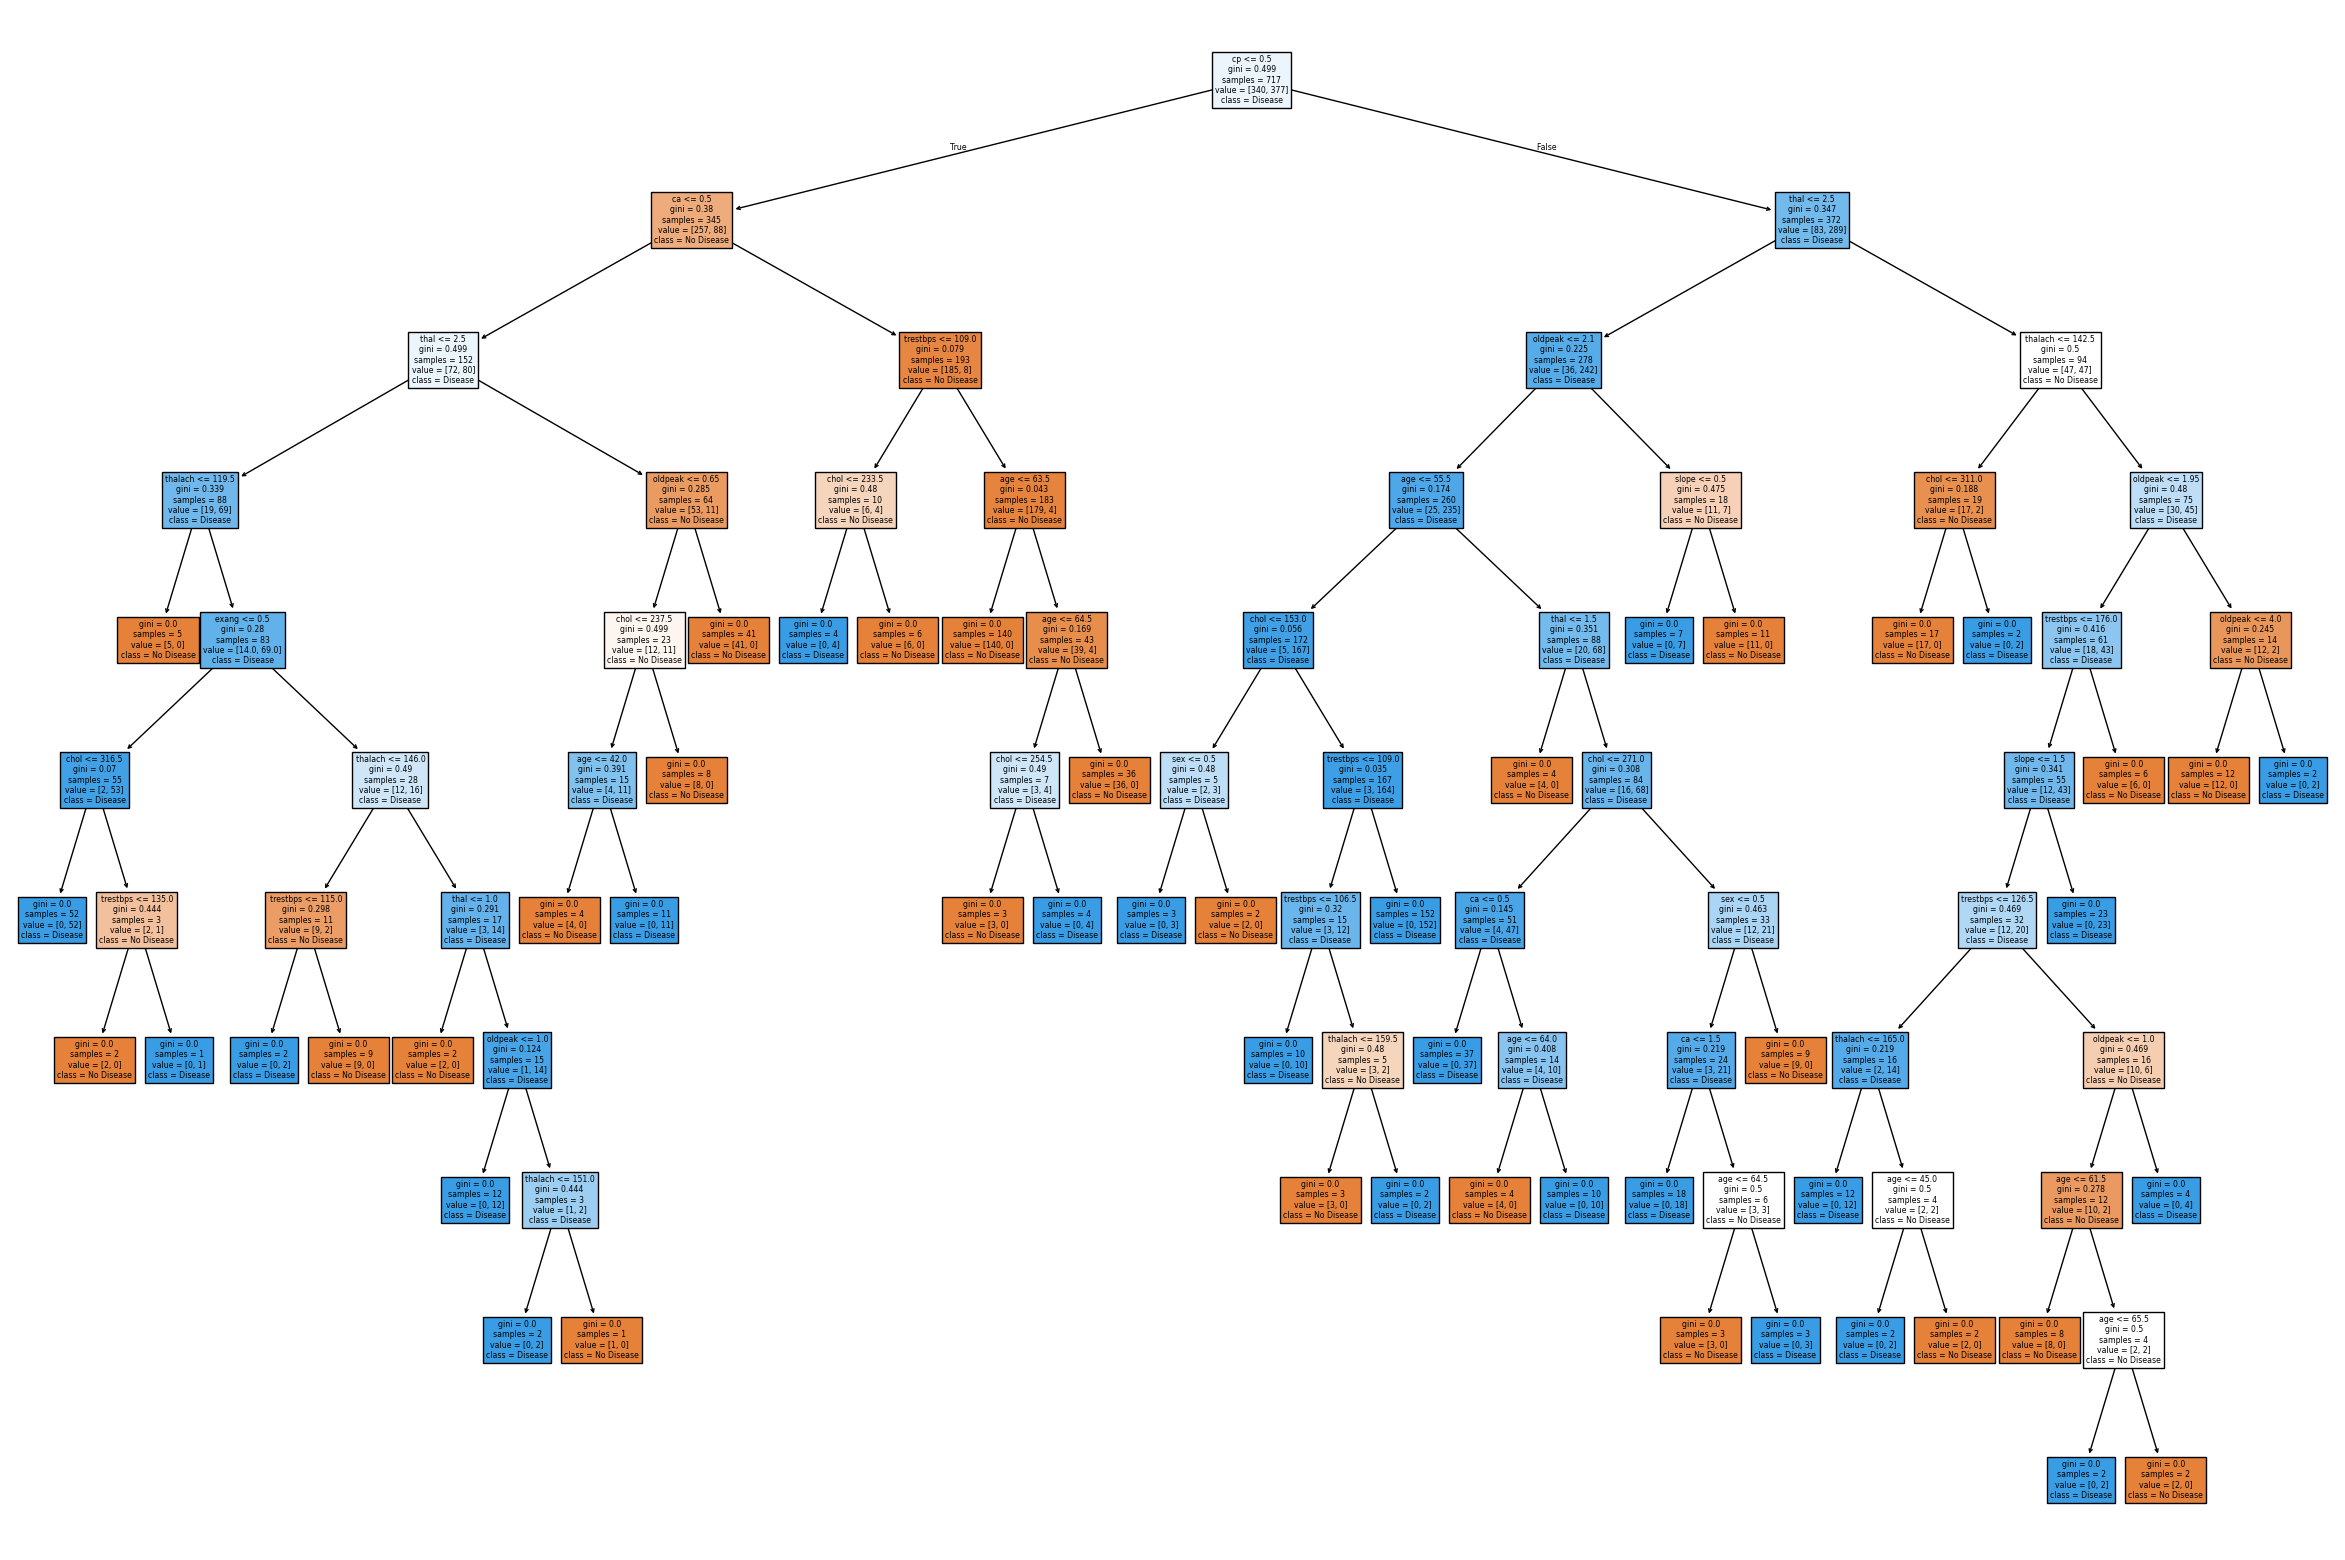

In [94]:
from sklearn import tree
plt.figure(figsize=(30,20))
tree.plot_tree(model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()

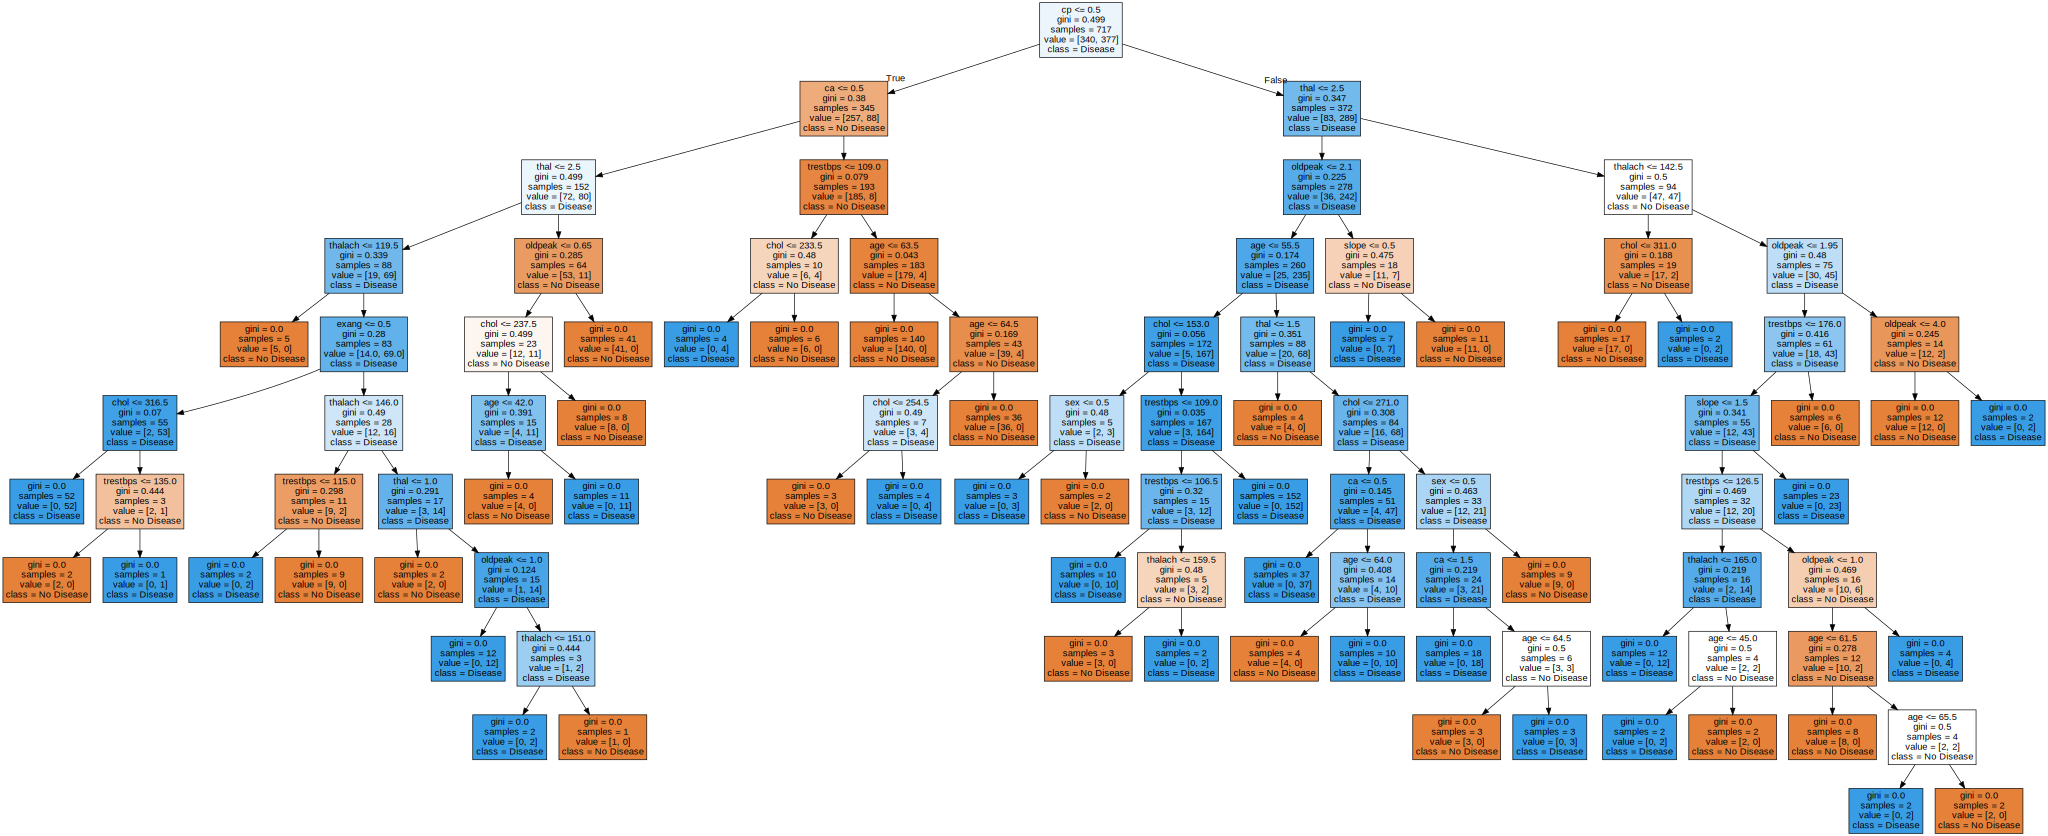

In [95]:
# Using graphviz for high-quality visualization

!pip install graphviz
import graphviz
dot_data = tree.export_graphviz(model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", view=True, cleanup=True)
graph

In [96]:
#Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9707792207792207

Confusion Matrix:
 [[159   0]
 [  9 140]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



In [97]:
#Pruning the tree to avoid overfitting, using max_depth and min_samples_split hyper-parameters to do so
model_pruned = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
model_pruned.fit(X_train, y_train)
y_pred_pruned = model_pruned.predict(X_test)
print(f'Accuracy (max_depth=3): {accuracy_score(y_test, y_pred_pruned):.2f}')

Accuracy (max_depth=3): 0.84


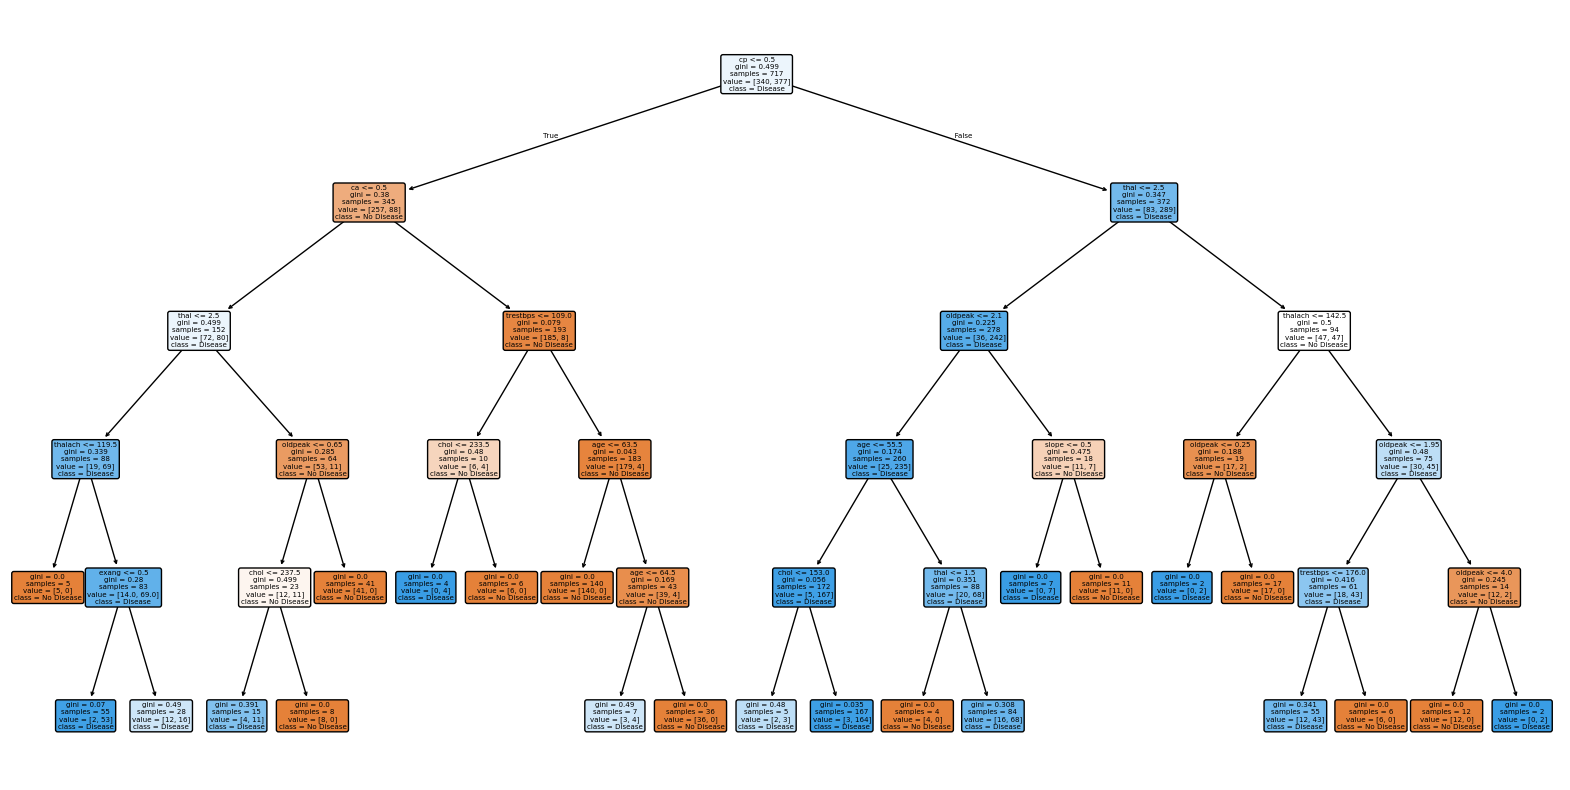

In [98]:
#Visualizing the pruned tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model_pruned,
          filled=True,
          feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          rounded=True)
plt.show()

Observation: Accuracy of the model is decreased from 0.97 to 0.84 when the tree is pruned to max_depth = 5, but recall is increased.

In [99]:
#Comparing model before and after pruning
print("Without max_depth:")
print(f'Accuracy : {accuracy_score(y_test, y_pred):.2f}')
print(confusion_matrix(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))

print("\nWith max_depth=5:")
print(f'Accuracy (max_depth=5): {accuracy_score(y_test, y_pred_pruned):.2f}')
print(confusion_matrix(y_test, y_pred_pruned))
print(classification_report(y_test, y_pred_pruned))

Without max_depth:
Accuracy : 0.97
[[159   0]
 [  9 140]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308


With max_depth=5:
Accuracy (max_depth=5): 0.84
[[117  42]
 [  6 143]]
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       159
           1       0.77      0.96      0.86       149

    accuracy                           0.84       308
   macro avg       0.86      0.85      0.84       308
weighted avg       0.86      0.84      0.84       308



In [100]:
#Tuning hyper-parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4,5,6,7,8,9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print(f'Best params: {grid.best_params_}')


Best params: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [101]:
# Importing and training Random forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Evaluation:
Accuracy: 0.9805194805194806

Confusion Matrix:
 [[159   0]
 [  6 143]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



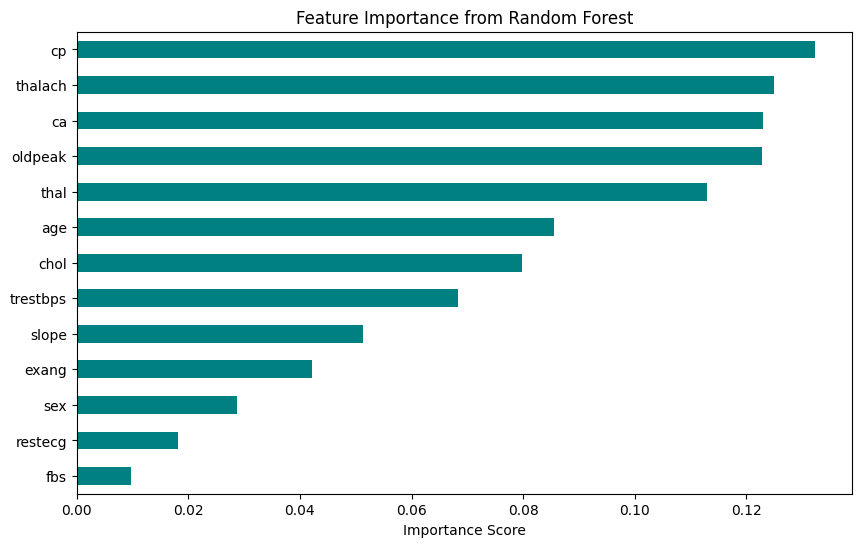

In [102]:
# Extract importance scores
importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort and visualize
importances.sort_values().plot(kind='barh', figsize=(10,6), color='teal')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.show()

Observation: Features like 'fbs', 'restecg' and 'sex' show very less score, this means that these features can do not put significant impact on the target variable and can be dropped for the simplification of the model.

In [103]:
from sklearn.model_selection import cross_val_score
# Cross-validation on Random Forest
scores = cross_val_score(rf_model, X, y, cv=10)  # 10-fold CV
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.2f}")

Cross-Validation Scores: [1.         1.         1.         1.         1.         1.
 1.         1.         0.97058824 1.        ]
Mean Accuracy: 1.00
